# A Morphological graph sample

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("../")

In [175]:
import pickle
from itertools import chain
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from CwnGraph import CwnBase
from MWE2019.utils import get_cache_path, install_data_cache

In [3]:
from MWE2019.cwn_vectors import CwnVectors
from MWE2019.cwn_morph_graph import CwnMorphGraph

In [150]:
cwn_mg = CwnMorphGraph()
cwn_vec = CwnVectors()

graph loaded from  ..\MWE2019\..\data\cache_cwn_morph_graph\CwnMorphGraph.pkl
load from cache:  E:\LangOn\MWE2019\data\cache_cwn_vectors\cwn_vectors.pkl


In [151]:
G = cwn_mg.G

In [161]:
binx, freq = np.unique([x for n, x in G.degree], return_counts=True)
binx, freq

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  68,
         70,  74,  75,  77,  78,  80,  81,  82,  84,  85,  86,  87,  89,
        103, 112, 113, 116, 132]),
 array([ 1723, 11342,  1232,   753,   501,   333,   307,   244,   202,
          180,   169,   142,   122,    94,    88,    87,    71,    54,
           59,    43,    36,    35,    48,    22,    24,    21,    21,
           30,    15,    10,    21,    15,    22,    11,    11,     7,
           11,    11,    14,    12,     6,     7,     7,     1,     5,
            5,     3,     6,     7,     3,     3,     3,     4,     3,
            2,     4,     1,     3,     4,     3,     2,     2,     1,
            1,     2,     1,  

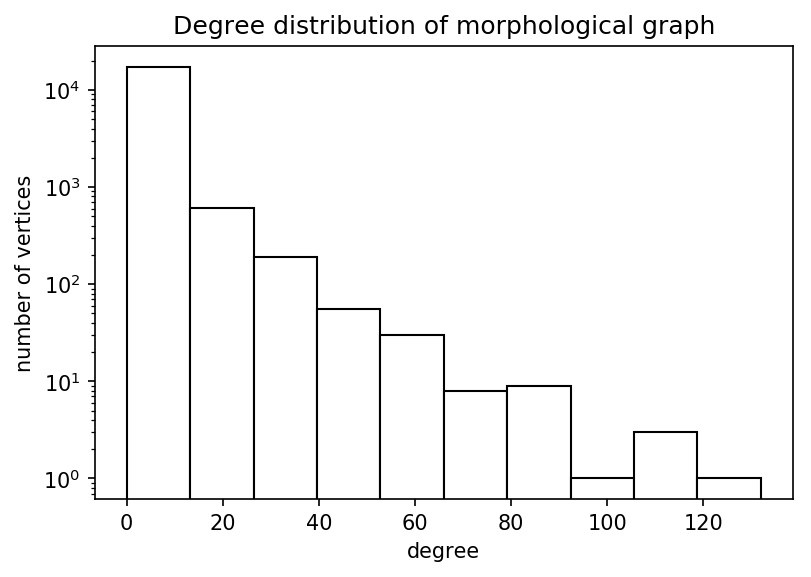

In [179]:
fig = plt.figure(figsize=(6,4), dpi=150)
plt.hist([x for n, x in G.degree], log=True, facecolor='white', edgecolor='black')
plt.xlabel('degree')
plt.ylabel('number of vertices')
plt.title('Degree distribution of morphological graph')

fig.savefig(get_cache_path('model_results', 'degree_dist.png'))

In [152]:
label_map = {}
for i in sG:
    word = cwn_vec.itos[i]
    tl = ' '.join([x[0] for x in pinyin(word)])
    label_map[i] = f"{word}\n{tl}\n()"

    

{407: Text(-0.907252,-0.23879,'句\njù\n()'),
 15365: Text(-0.0977549,0.930901,'討論\ntǎo lùn\n()'),
 15627: Text(0.261735,0.739305,'講話\njiǎng huà\n()'),
 15342: Text(0.175539,-0.592952,'言語\nyán yǔ\n()'),
 15502: Text(-0.690844,-0.621937,'語文\nyǔ wén\n()'),
 15503: Text(0.0187794,-1,'語氣\nyǔ qì\n()'),
 15504: Text(-0.793272,0.129734,'語法\nyǔ fǎ\n()'),
 15505: Text(0.922457,-0.0577441,'語系\nyǔ xì\n()'),
 15539: Text(0.565828,0.734722,'說話\nshuō huà\n()'),
 15507: Text(-0.237968,-0.667564,'語言\nyǔ yán\n()'),
 15506: Text(-0.473755,0.773354,'語義\nyǔ yì\n()'),
 15508: Text(0.813144,0.362586,'語調\nyǔ diào\n()'),
 3031: Text(0.502172,-0.351066,'言\nyán\n()'),
 15509: Text(0.724838,-0.665481,'語錄\nyǔ lù\n()'),
 15510: Text(-0.779489,0.510924,'語音\nyǔ yīn\n()'),
 3071: Text(-0.00415693,0.0140078,'語\nyǔ\n()')}

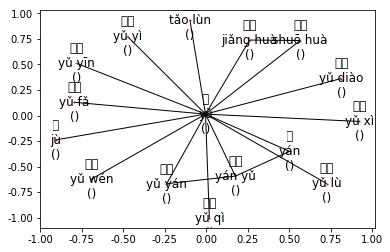

In [153]:
base_n = cwn_vec.stoi["語"]
sG = G.subgraph(chain(G.neighbors(base_n), [base_n]))
pos = nx.spring_layout(sG, weight=None)
nx.draw_networkx(sG, pos, node_size=1, font_size=0)
nx.draw_networkx_labels(sG, pos, {i: label_map[i] for i in sG})

In [154]:
sG.edges(data=True)

EdgeDataView([(407, 3071, {'weight': 3.307796639479729, 'reltype': 'hyponym'}), (15365, 3071, {'weight': 3.307796639479729, 'reltype': 'synonym'}), (15627, 3071, {'weight': 3.307796639479729, 'reltype': 'synonym'}), (15627, 15539, {'weight': 3.307796639479729, 'reltype': 'synonym'}), (15342, 3031, {'weight': 4.406719247264253, 'reltype': 'morph'}), (15342, 3071, {'weight': 3.307796639479729, 'reltype': 'hypernym'}), (15342, 15507, {'weight': 3.307796639479729, 'reltype': 'hypernym'}), (15502, 3071, {'weight': 5.0106352940962555, 'reltype': 'morph'}), (15503, 3071, {'weight': 4.430816798843313, 'reltype': 'morph'}), (15504, 3071, {'weight': 5.442417710521793, 'reltype': 'morph'}), (15505, 3071, {'weight': 2.833213344056216, 'reltype': 'morph'}), (15539, 3071, {'weight': 3.307796639479729, 'reltype': 'synonym'}), (15507, 3071, {'weight': 6.889591308354466, 'reltype': 'morph'}), (15506, 3071, {'weight': 3.4011973816621555, 'reltype': 'morph'}), (15508, 3071, {'weight': 2.9444389791664403,

In [155]:
edge_label = {(e[0], e[1]): {"label": e[2]["reltype"]} for e in sG.edges(data=True) if e[2]["reltype"] != 'morph'}

In [156]:
edge_label

{(407, 3071): {'label': 'hyponym'},
 (15365, 3071): {'label': 'synonym'},
 (15627, 3071): {'label': 'synonym'},
 (15627, 15539): {'label': 'synonym'},
 (15342, 3071): {'label': 'hypernym'},
 (15342, 15507): {'label': 'hypernym'},
 (15539, 3071): {'label': 'synonym'},
 (3031, 3071): {'label': 'synonym'}}

In [157]:
nx.set_node_attributes(sG, {i: label_map[i] for i in sG}, 'label')
nx.set_node_attributes(sG, "標楷體", "fontname")
nx.set_edge_attributes(sG, edge_label)
dot = nx.nx_pydot.to_pydot(sG)

In [158]:
dot.set_node_defaults()
dot.to_string()

'strict graph  {\n407 [fontname="標楷體", label="句\\njù\\n()"];\n15365 [fontname="標楷體", label="討論\\ntǎo lùn\\n()"];\n15627 [fontname="標楷體", label="講話\\njiǎng huà\\n()"];\n15342 [fontname="標楷體", label="言語\\nyán yǔ\\n()"];\n15502 [fontname="標楷體", label="語文\\nyǔ wén\\n()"];\n15503 [fontname="標楷體", label="語氣\\nyǔ qì\\n()"];\n15504 [fontname="標楷體", label="語法\\nyǔ fǎ\\n()"];\n15505 [fontname="標楷體", label="語系\\nyǔ xì\\n()"];\n15539 [fontname="標楷體", label="說話\\nshuō huà\\n()"];\n15507 [fontname="標楷體", label="語言\\nyǔ yán\\n()"];\n15506 [fontname="標楷體", label="語義\\nyǔ yì\\n()"];\n15508 [fontname="標楷體", label="語調\\nyǔ diào\\n()"];\n3031 [fontname="標楷體", label="言\\nyán\\n()"];\n15509 [fontname="標楷體", label="語錄\\nyǔ lù\\n()"];\n15510 [fontname="標楷體", label="語音\\nyǔ yīn\\n()"];\n3071 [fontname="標楷體", label="語\\nyǔ\\n()"];\n407 -- 3071  [label=hyponym, reltype=hyponym, weight="3.307796639479729"];\n15365 -- 3071  [label=synonym, reltype=synonym, weight="3.307796639479729"];\n15627 -- 3071  [label=synony

In [159]:
dot.write('h:/test.png', prog=['neato', '-Goverlap=false'], format='png', encoding="UTF-8")

True

In [160]:
with open("h:/test.dot", "w", encoding="UTF-8") as fout:
    fout.write(dot.to_string())

In [100]:
from pypinyin import pinyin

In [112]:
label_map

{407: '句\njù',
 15365: '討論\ntǎo lùn',
 15627: '講話\njiǎng huà',
 15342: '言語\nyán yǔ',
 15502: '語文\nyǔ wén',
 15503: '語氣\nyǔ qì',
 15504: '語法\nyǔ fǎ',
 15505: '語系\nyǔ xì',
 15539: '說話\nshuō huà',
 15507: '語言\nyǔ yán',
 15506: '語義\nyǔ yì',
 15508: '語調\nyǔ diào',
 3031: '言\nyán',
 15509: '語錄\nyǔ lù',
 15510: '語音\nyǔ yīn',
 3071: '語\nyǔ'}

In [110]:
[x[0] for x in pinyin("語言")]

['yǔ', 'yán']